In [4]:
import numpy as np


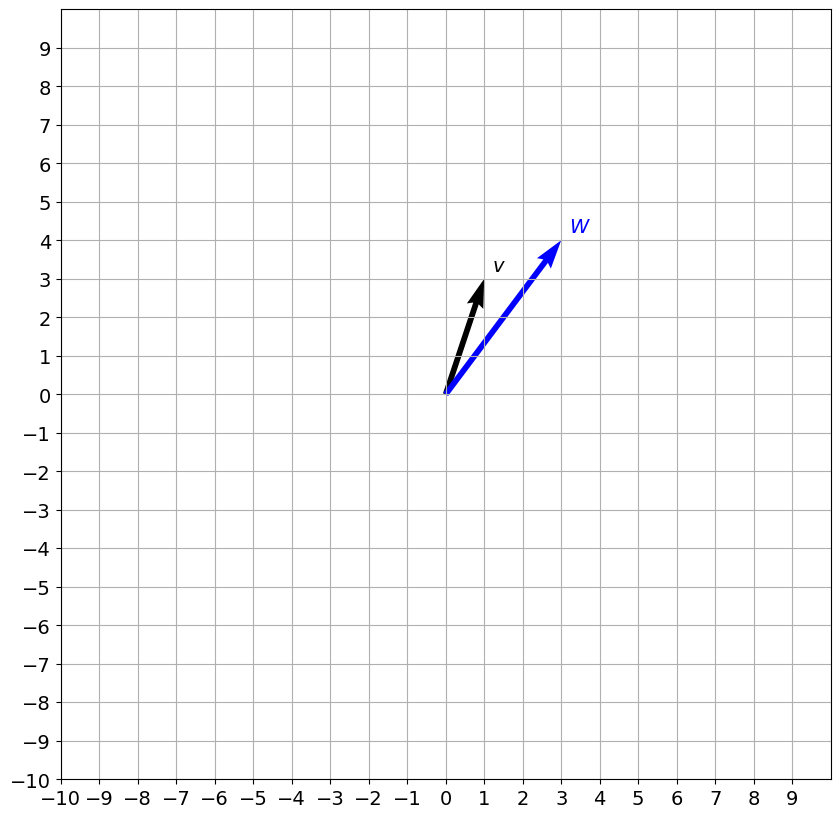

In [34]:
import matplotlib.pyplot as plt

def plot_vectors(list_v, list_label, list_color):
    _, ax = plt.subplots(figsize=(10, 10))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))
    
    
    plt.axis([-10, 10, -10, 10])
    for i, v in enumerate(list_v):
        sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v)])
        plt.quiver(v[0], v[1], color=list_color[i], angles='xy', scale_units='xy', scale=1)
        ax.text(v[0]-0.2+sgn[0], v[1]-0.2+sgn[1], list_label[i], fontsize=14, color=list_color[i])

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

v = np.array([[1],[3 ]])
W = np.array([[3],[4 ]])
# Arguments: list of vectors as NumPy arrays, labels, colors.
plot_vectors([v, W], [f"$v$", f"$W$"], ["black", "blue"])

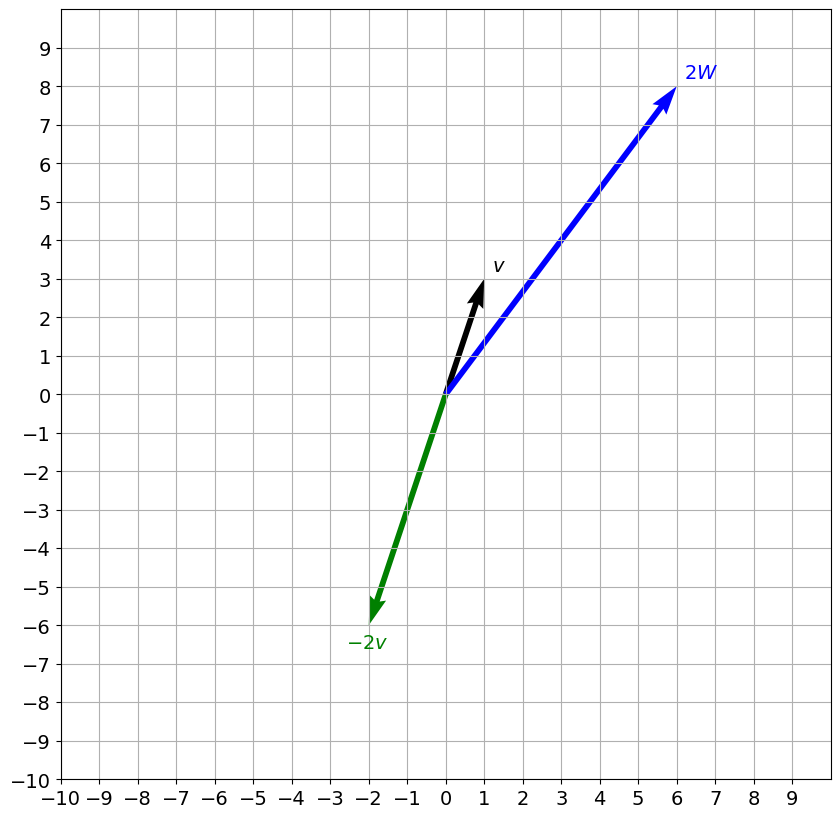

In [6]:
plot_vectors([v, 2*W, -2*v], [f"$v$", f"$2W$", f"$-2v$"], ["black", "blue", "green"])

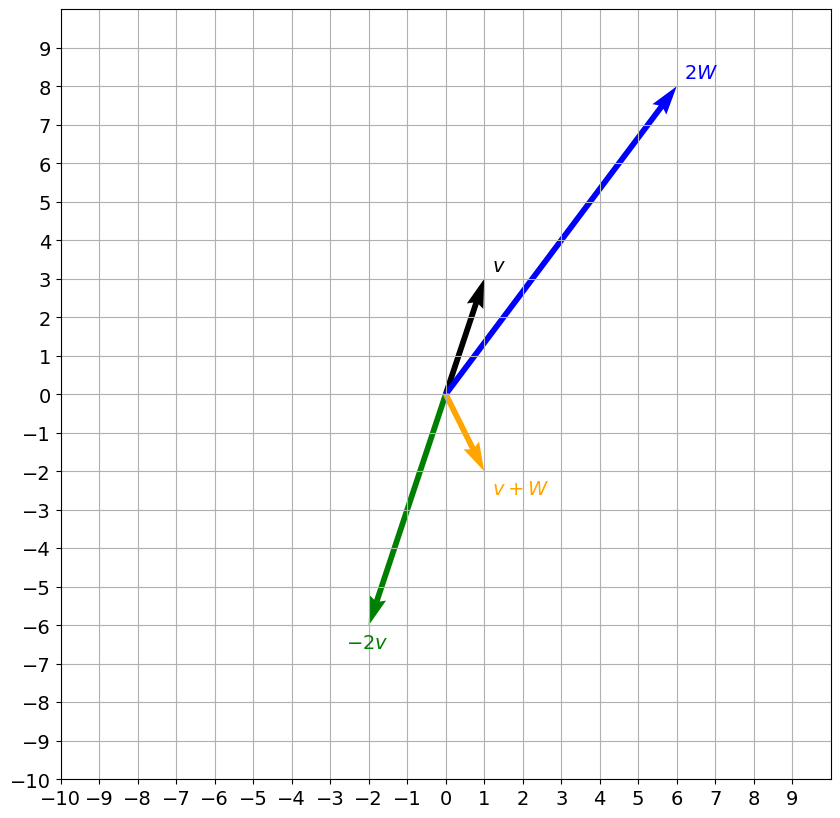

In [7]:
plot_vectors([v, 2*W, -2*v , -2*v + W], [f"$v$", f"$2W$", f"$-2v$", f"$v + W$"], ["black", "blue", "green", "orange"])

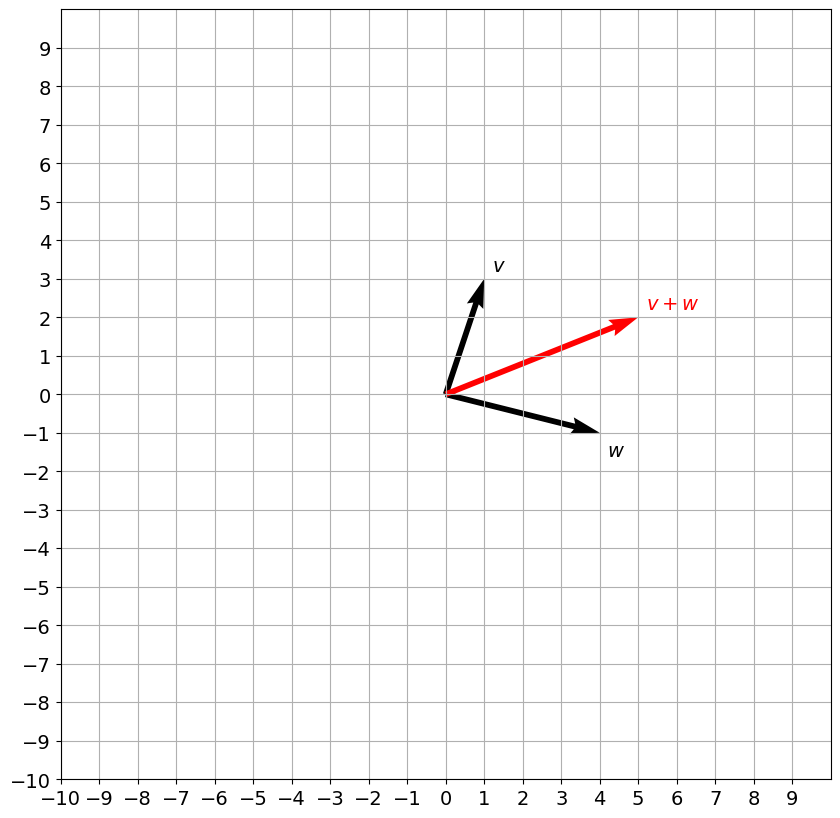

In [33]:
v = np.array([[1],[3]])
w = np.array([[4],[-1]])

plot_vectors([v, w, v + w], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])
# plot_vectors([v, w, np.add(v, w)], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])

In [9]:
print("Norm of a vector v is", np.linalg.norm(v))
print("Norm of a vector w is", np.linalg.norm(w))

Norm of a vector v is 3.1622776601683795
Norm of a vector w is 4.123105625617661


In [10]:
x = [1, -2, -5]
y = [4, 3, -1]

def dot(x, y):
    s=0
    for xi, yi in zip(x, y):
        s += xi * yi
    return s

print("The dot product of x and y is", dot(x, y))
print("np.dot(x,y) function returns dot product of x and y:", np.dot(x, y)) 

The dot product of x and y is 3
np.dot(x,y) function returns dot product of x and y: 3


In [11]:
print("This line output is a dot product of x and y: ", np.array(x) @ np.array(y))

try:
    print(x @ y)
except TypeError as err:
    print("\nThis line output is an error:",err)

This line output is a dot product of x and y:  3

This line output is an error: unsupported operand type(s) for @: 'list' and 'list'


In [12]:
a = [4,5,6]
b = [1, 2, 3]

import time

tic = time.time()
c = dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the loop version:" + str(1000*(toc-tic)) + " ms")

Dot product:  32
Time for the loop version:0.2675056457519531 ms


In [13]:
A = np.array([[4, 9, 9], [9, 1, 6], [9, 2, 3]])
print("Matrix A (3 by 3):\n", A)

B = np.array([[2, 2], [5, 7], [4, 4]])
print("Matrix B (3 by 2):\n", B)

# np.matmul(A, B)
try:
    print(B @ A)
except ValueError as err:
    print(err)

Matrix A (3 by 3):
 [[4 9 9]
 [9 1 6]
 [9 2 3]]
Matrix B (3 by 2):
 [[2 2]
 [5 7]
 [4 4]]
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)


In [14]:
x = np.array([1, -2, -5])
y = np.array([4, 3, -1])

print("Shape of vector x:", x.shape)
print("Number of dimensions of vector x:", x.ndim)
print("Shape of vector x, reshaped to a matrix:", x.reshape((3, 1)).shape)
print("Number of dimensions of vector x, reshaped to a matrix:", x.reshape((3, 1)).ndim)

Shape of vector x: (3,)
Number of dimensions of vector x: 1
Shape of vector x, reshaped to a matrix: (3, 1)
Number of dimensions of vector x, reshaped to a matrix: 2


In [18]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]
    
    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9.]
 [  0.]
 [-10.]]


In [19]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v
    
    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

Original vector:
 [[3]
 [5]] 

 Result of the transformation:
 [[  9]
 [  0]
 [-10]]


In [21]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    
    return w
    
    
def transform_vectors(T, v1, v2):
    V = np.hstack((v1, v2))
    W = T(V)
    
    return W
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[2 0]
 [0 1]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

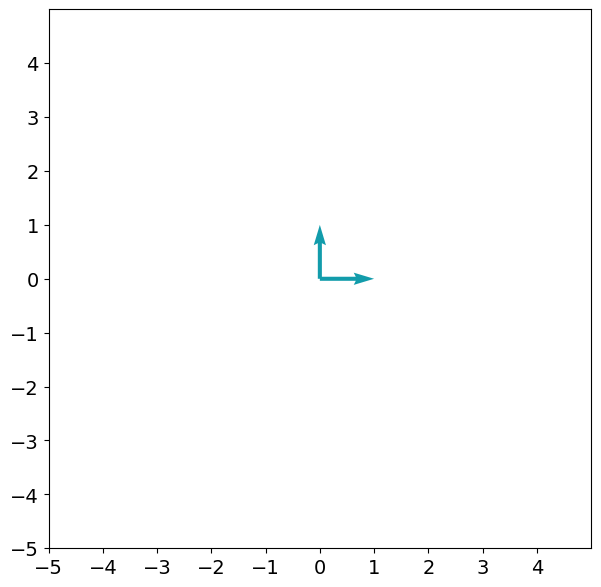

In [27]:
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0],[0, 0], [e1[0], e2[0]], [e1[1], e2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    # Plot the parallelogram formed by e1 and e2: 0 -> e1 -> e1+e2 -> e2 -> 0
    plt.plot([0, e1[0], e1[0]+e2[0], e2[0], 0], 
             [0, e1[1], e1[1]+e2[1], e2[1], 0], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
    ax.text(e1[0]-0.2+e1_sgn[0], e1[1]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
    ax.text(e2[0]-0.2+e2_sgn[0], e2[1]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0],[0, 0], [e1_transformed[0], e2_transformed[0]], [e1_transformed[1], e2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    # Plot transformed parallelogram: 0 -> T(e1) -> T(e1)+T(e2) -> T(e2) -> 0
    plt.plot([0, e1_transformed[0], e1_transformed[0]+e2_transformed[0], e2_transformed[0], 0], 
             [0, e1_transformed[1], e1_transformed[1]+e2_transformed[1], e2_transformed[1], 0], 
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)])
    ax.text(e1_transformed[0]-0.2+e1_transformed_sgn[0], e1_transformed[1]-e1_transformed_sgn[1], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)])
    ax.text(e2_transformed[0]-0.2+e2_transformed_sgn[0], e2_transformed[1]-e2_transformed_sgn[1], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(T_hscaling, e1, e2)

In [25]:
# Numeric checks for transformations T, L and T_hscaling
import numpy as np

# Define matrix form of T and apply to v
A_T = np.array([[3, 0], [0, 0], [0, -2]])
v = np.array([[3], [5]])
w_T = A_T @ v
print('T matrix A_T:', A_T)
print('v:', v)
print('T(v) = A_T @ v =')
print(w_T)

# If L() exists in earlier cells, compare results
try:
    w_from_L = L(v)
    print('L(v) from function L() =')
    print(w_from_L)
except Exception as e:
    print('Function L not available or error:', e)

# T_hscaling on basis vectors e1, e2
A_h = np.array([[2, 0], [0, 1]])
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])
W = A_h @ np.hstack((e1, e2))
print('T_hscaling matrix A_h:', A_h)
print('T_hscaling(e1), T_hscaling(e2) as columns:')
print(W)

# Norms
print('||v|| =', np.linalg.norm(v))
print('||T(v)|| =', np.linalg.norm(w_T))

T matrix A_T: [[ 3  0]
 [ 0  0]
 [ 0 -2]]
v: [[3]
 [5]]
T(v) = A_T @ v =
[[  9]
 [  0]
 [-10]]
Transformation matrix:
 [[ 3  0]
 [ 0  0]
 [ 0 -2]] 

L(v) from function L() =
[[  9]
 [  0]
 [-10]]
T_hscaling matrix A_h: [[2 0]
 [0 1]]
T_hscaling(e1), T_hscaling(e2) as columns:
[[2 0]
 [0 1]]
||v|| = 5.830951894845301
||T(v)|| = 13.45362404707371


In [31]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v
    
    return w
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

Original vectors:
 e1= 
 [[1]
 [0]] 
 e2=
 [[0]
 [1]] 

 Result of the transformation (matrix form):
 [[-1  0]
 [ 0  1]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

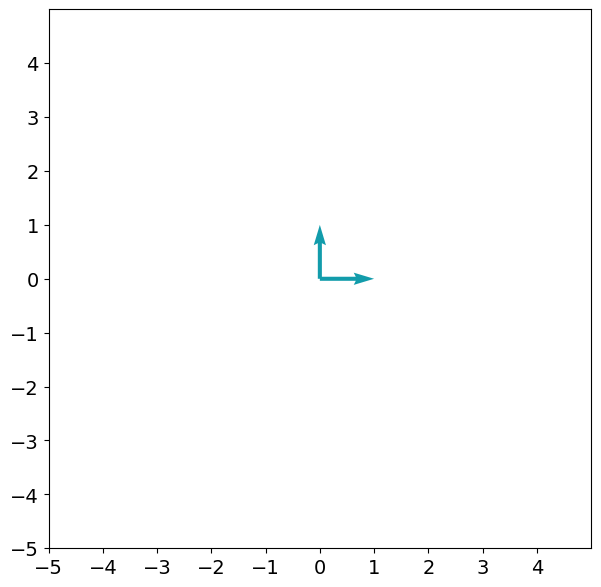

In [32]:
plot_transformation(T_reflection_yaxis, e1, e2)